<a href="https://colab.research.google.com/github/mehulpuri/ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<ipython-input-1-fe40da394528>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
# We want to generate Data, X, Y
# we can assume some linear function
# and we wont tell our model what the function we are assuming is, it is the
# models task to figure out our function
#m  = 100
#X = np.random.randn(m)*10 # randn is normal dist , generates vals between (-1,1)
#Yideal = 3*X+1
# at present our data is ideal , no noise, in it that is why it would show a strt line

#noise= np.random.randn(m)
#Y = 3*X+1+noise*6
#plt.scatter(X,Y)
#plt.show()

In [ ]:
# Data Generation
def generateData(m):
  X=  np.random.randn(m)*10
  noise = np.random.randn(m)
  y = 3*X+1+noise*5
  return X,y

In [ ]:
X, y= generateData(100)
print(X.shape, y.shape)

(100,) (100,)


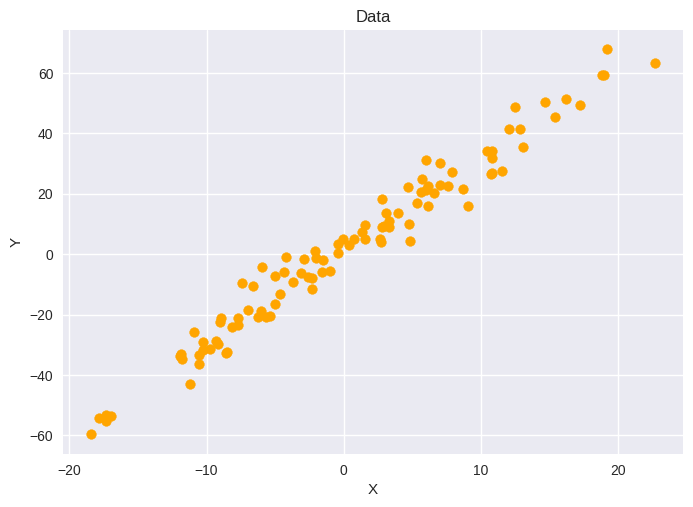

In [ ]:
def plotData(X,y, color='orange', title= 'Data'):
  plt.scatter(X, y, c=color)
  plt.title(title)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()
plotData(X, y)

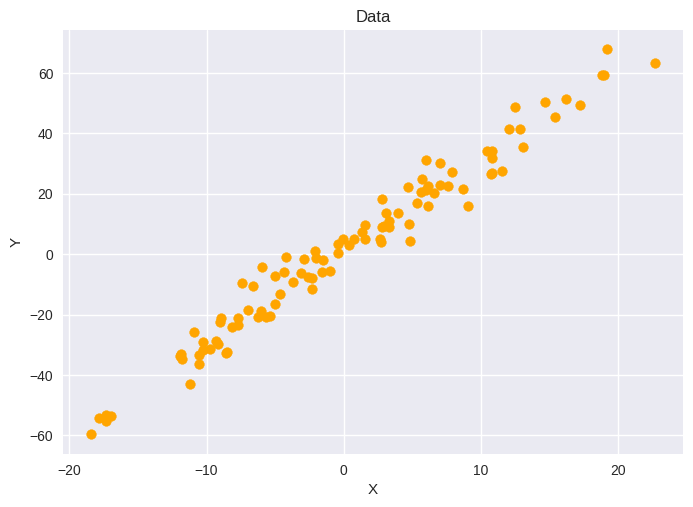

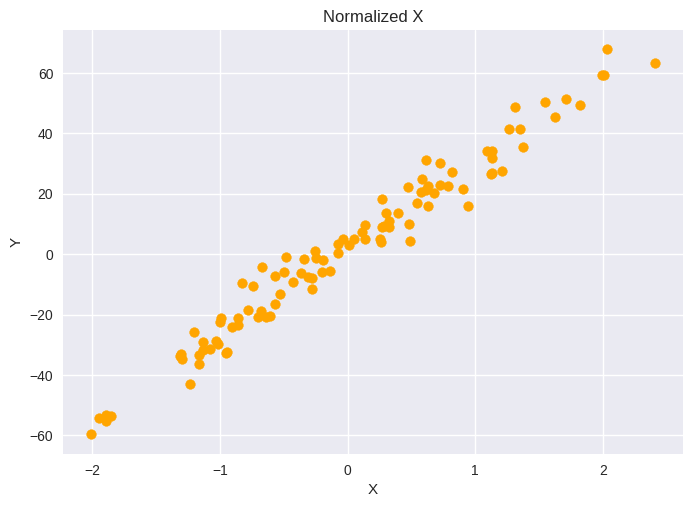

In [ ]:
#Normalizing Data

def normalize(X):
  X=(X-X.mean())/X.std() # mean and std are inbuilt in np
  return X
plotData(X,y)
X = normalize(X)
plotData(X,y, title='Normalized X')

In [ ]:
# Train-Test Split
def trainTestSplit(X, y, split=0.8):
  m=X.shape[0] # 100 samples
  # we make a new matrix called data, with all the 100 examples
  data = np.zeros((m,2))  # data is matrix of zeroes with m rows and 2 columns
  data[:,0] =X # in data matrix, across all rows and 0 column we put X
  data[:,1] = y# in data matrix, across all rows and 1 column we put y
  np.random.shuffle(data)
  split = int(m*split) # integer that tells how many rows for training
  XT = data[:split, 0] # pick all data upto split in column 0(X) for training data
  yT = data[:split,1] # pick all rows upto split in column 1(y) for training data
  Xt = data[split:, 0] # pick all rows after split to end of column 0(X) for test data
  yt = data[split:, 1] # pick all rows after split to end of column 1()y for test data
  return XT, yT, Xt, yt

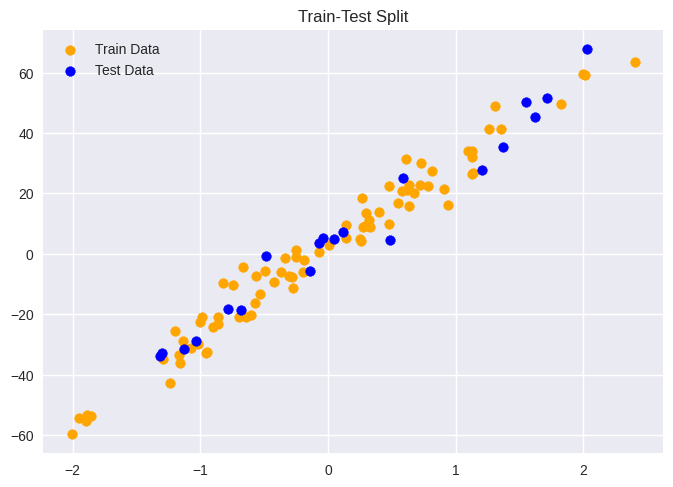

In [ ]:
XT, yT, Xt, yt = trainTestSplit(X, y)
plt.scatter(XT, yT, color='orange', label='Train Data')
plt.scatter(Xt,yt, color= 'blue', label='Test Data')
plt.legend()
plt.title('Train-Test Split')
plt
plt.show()

In [ ]:
# Modelling

In [ ]:
#Hypothesis Function
def hypothesis(X, theta):
  return theta[0] +theta[1]*X

#Error Function J(theta)
#1/2m sum (yi-yhati)^2 yhati =htheta(x) = theta(0) + theta(1)*x

def error(X,y, theta):
  m=X.shape[0]
  e=0
  for i in range(m):
    y_i = hypothesis(X[i], theta) #prediction
    e=e+(y[i] - y_i)**2
  return e/(2*m)

#Gradient Calculator (Calculates Partial Derivative)
# wil give 2 values one with respect to theta0 and other respect to theta1
# we have a common expression in partial derivatives of both wrt theta0 and theta 1
#htheta(x(i)) - y(i)
def gradient(X, y, theta):
  m =X.shape[0]
  grad = np.zeros((2))
  for i in range(m):
    commonExpr = hypothesis(X[i], theta) - y[i]
    grad[0] += (commonExpr)
    grad[1] += (commonExpr)*X[i]
  return grad/m

#Training Function which has the learning Loop
# Learning Loop
# step = step - alpha*gradient
def train(X, y, learningRate= 0.1): # lr is hyperparameter, play with and decide
  theta = np.zeros((2,))
  maxItr =50 #maxitr is also a hyperparameter have to play with and decide
  error_list=[] # we would like to see that in each iteration is our error dec or not

  for i in range(maxItr):
    grad = gradient(X,y,theta)
    error_list.append(error(X,y,theta))
    theta[0] = theta[0] - learningRate*grad[0]
    theta[1] = theta[1] - learningRate*grad[1]
  plt.plot(error_list)
  plt.xlabel('Iterations')
  plt.ylabel('Error')
  return theta


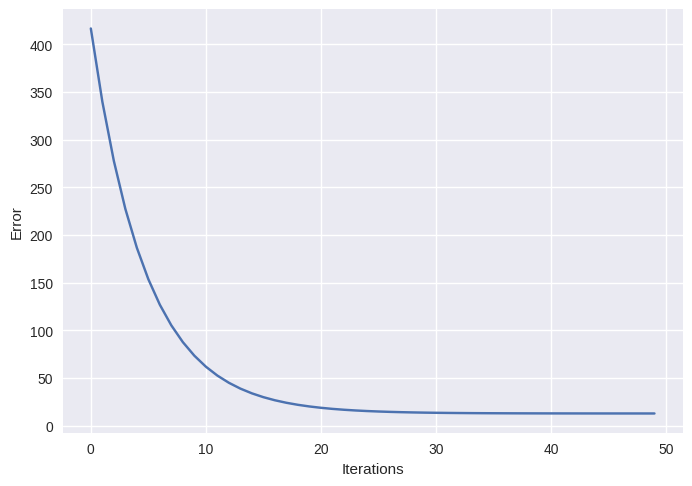

In [ ]:
theta = train(X,y)

In [ ]:
def predict(X, theta):
  return hypothesis(X,theta)

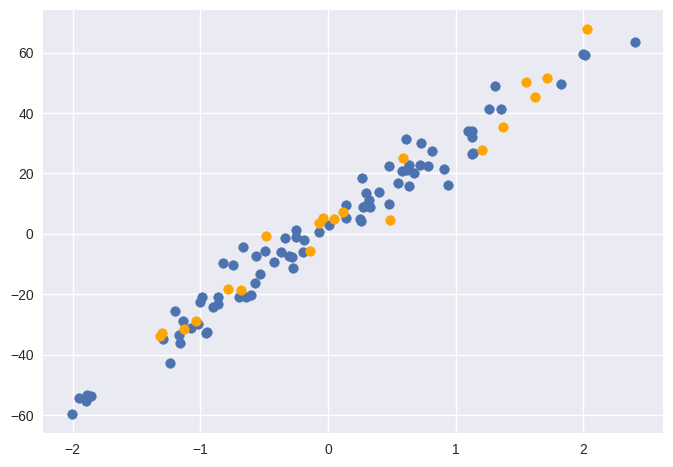

In [ ]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt, color= 'orange')

In [ ]:
yp = predict(Xt,theta) # 20 predictions

yp.shape


(20,)

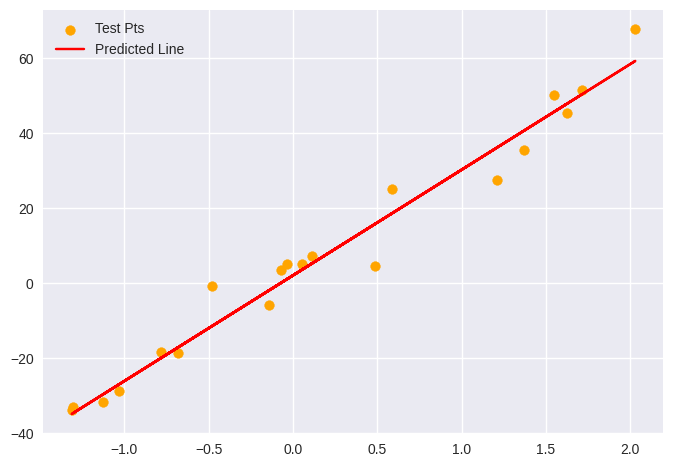

In [ ]:
plt.scatter(Xt,yt, color= 'orange', label='Test Pts')
plt.plot(Xt,yp, color='red', label='Predicted Line')
plt.legend()
plt.show()

In [ ]:
#Model Evaluation
#1-T1/T2
#1- sumi=1 to m(yi - ypi)^2/sumi=1tom(yi- ymean)^2

def r2score(y, yp):
  ymean = y.mean()
  t1 = np.sum((y-yp)**2)
  t2 = np.sum((y-ymean)**2)
  return 1-(t1/t2)
r2sc = r2score(yt,yp)
r2sc

0.9697045950339336